In [1]:
#importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier



import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv("D:\ExcelR Data Science\Assignments\Decision Tree\Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
print("Min Value",df[["Sales"]].min())
print("Max Value",df[["Sales"]].max())

Min Value Sales    0.0
dtype: float64
Max Value Sales    16.27
dtype: float64


#### Converting target varible to Category column using Sklearn

In [4]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', 
                       strategy='uniform')
df['Sales'] = est.fit_transform(df[['Sales']])
df['Age'] = est.fit_transform(df[['Age']])

In [5]:
df.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2.0,138,73,11,276,120,Bad,1.0,17,Yes,Yes
1,2.0,111,48,16,260,83,Good,2.0,10,Yes,Yes
2,2.0,113,35,10,269,80,Medium,2.0,12,Yes,Yes
3,1.0,117,100,4,466,97,Medium,2.0,14,Yes,Yes
4,1.0,141,64,3,340,128,Bad,0.0,13,Yes,No


In [6]:
# typecasting to Integer
df['Sales'] = df['Sales'].astype('int')
df['Age'] = df['Age'].astype('int')

In [7]:
df.head(25)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,Bad,1,17,Yes,Yes
1,2,111,48,16,260,83,Good,2,10,Yes,Yes
2,2,113,35,10,269,80,Medium,2,12,Yes,Yes
3,1,117,100,4,466,97,Medium,2,14,Yes,Yes
4,1,141,64,3,340,128,Bad,0,13,Yes,No
5,2,124,113,13,501,72,Bad,3,16,No,Yes
6,1,115,105,0,45,108,Medium,3,15,Yes,No
7,2,136,81,15,425,120,Good,3,10,Yes,Yes
8,1,132,110,0,108,124,Medium,3,10,No,No
9,1,132,113,0,131,124,Medium,3,17,No,Yes


In [8]:
df.dtypes

Sales           int32
CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int32
Education       int64
Urban          object
US             object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['ShelveLoc']=le.fit_transform(df['ShelveLoc'])
df['US']=le.fit_transform(df['US'])
df['Urban']=le.fit_transform(df['Urban'])

<AxesSubplot:>

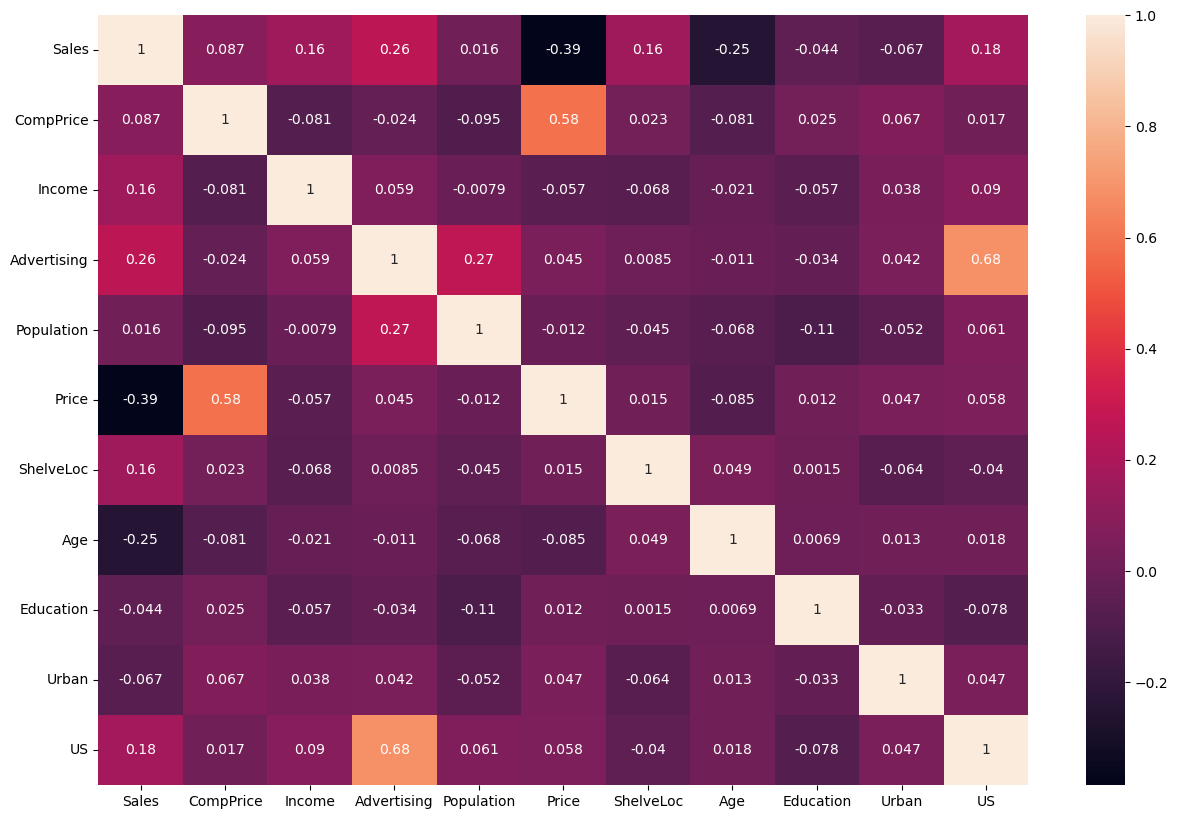

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [11]:
X=df.drop('Sales',axis=1)
X.shape

(400, 10)

In [12]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X=sd.fit_transform(X)

In [13]:
Y=df['Sales']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42)

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42) #Create Instance
model = dt.fit(X_train, y_train)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(X_test)

   #print predictions

print(confusion_matrix(y_test, pred))
print("Accuracy:\n",accuracy_score(y_test, pred))

[[ 5  4  0  0]
 [ 9 25 13  1]
 [ 1 13 14  3]
 [ 0  1  8  3]]
Accuracy:
 0.47


In [17]:
from sklearn import tree
#tree.plot_tree(model, feature_names=X.columns)

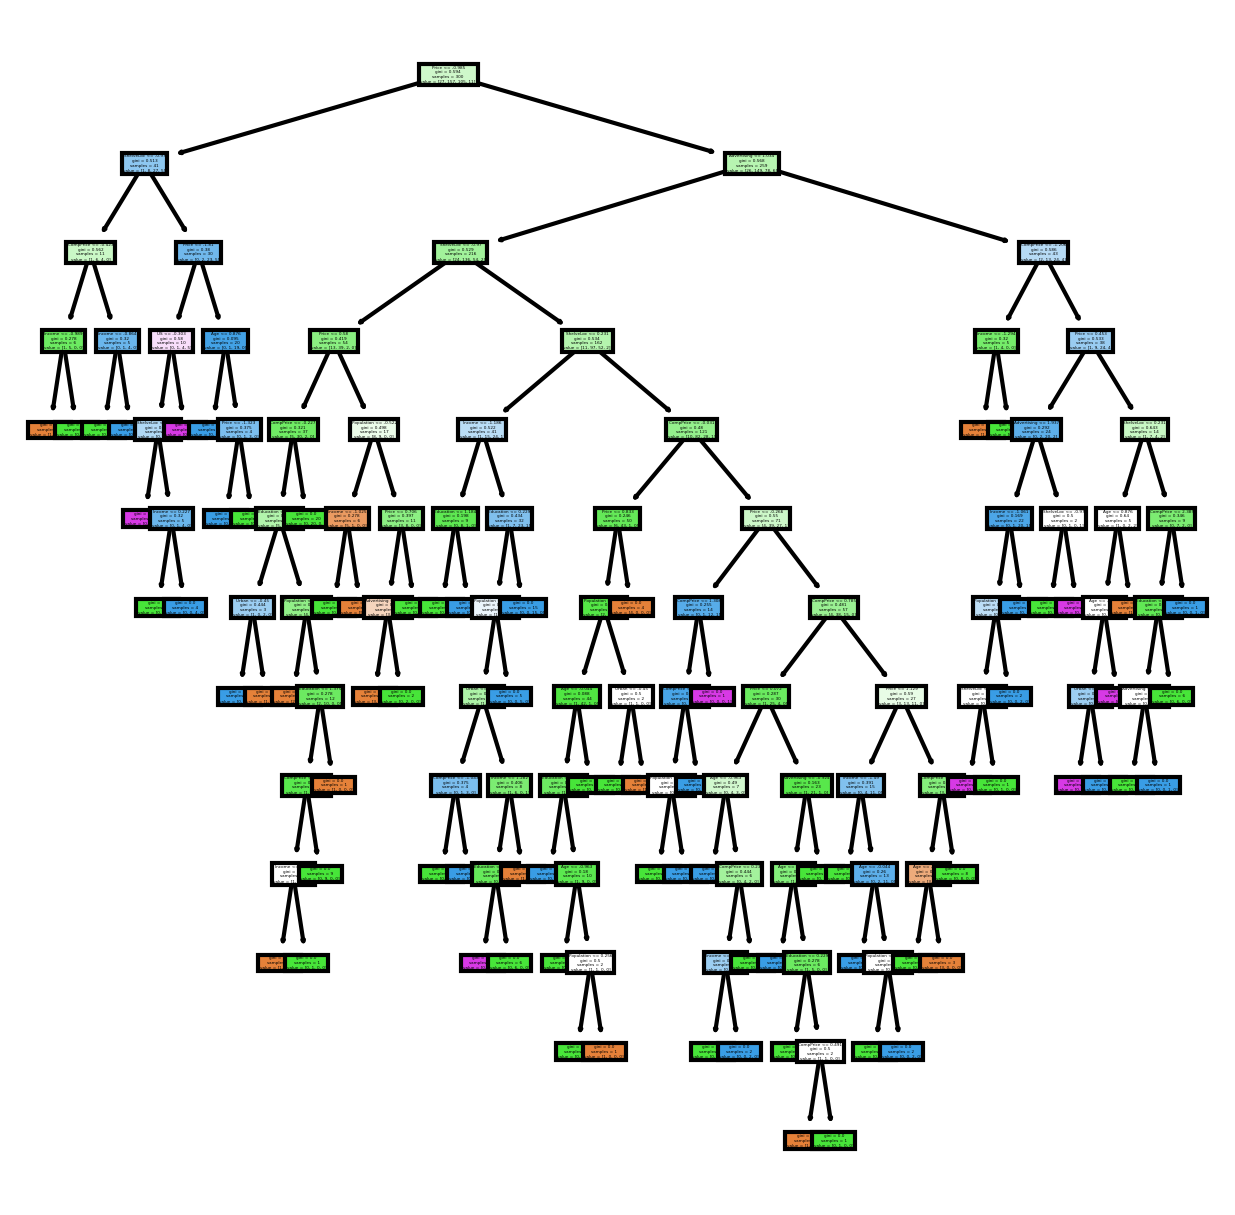

In [25]:
X1=df.drop('Sales',axis=1)
fn=X1.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,feature_names = fn, 
               
               filled = True);

#### Entropy based Decision Tree 

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42, criterion = 'entropy',max_depth=3) #Create Instance
model_ent = dt.fit(X_train, y_train)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model_ent.predict(X_test)

   #print predictions

print(confusion_matrix(y_test, pred)) #cm(true data, predictions)
print("Accuracy:\n",accuracy_score(y_test, pred))

[[ 1  8  0  0]
 [ 1 44  3  0]
 [ 0 26  5  0]
 [ 0  7  5  0]]
Accuracy:
 0.5


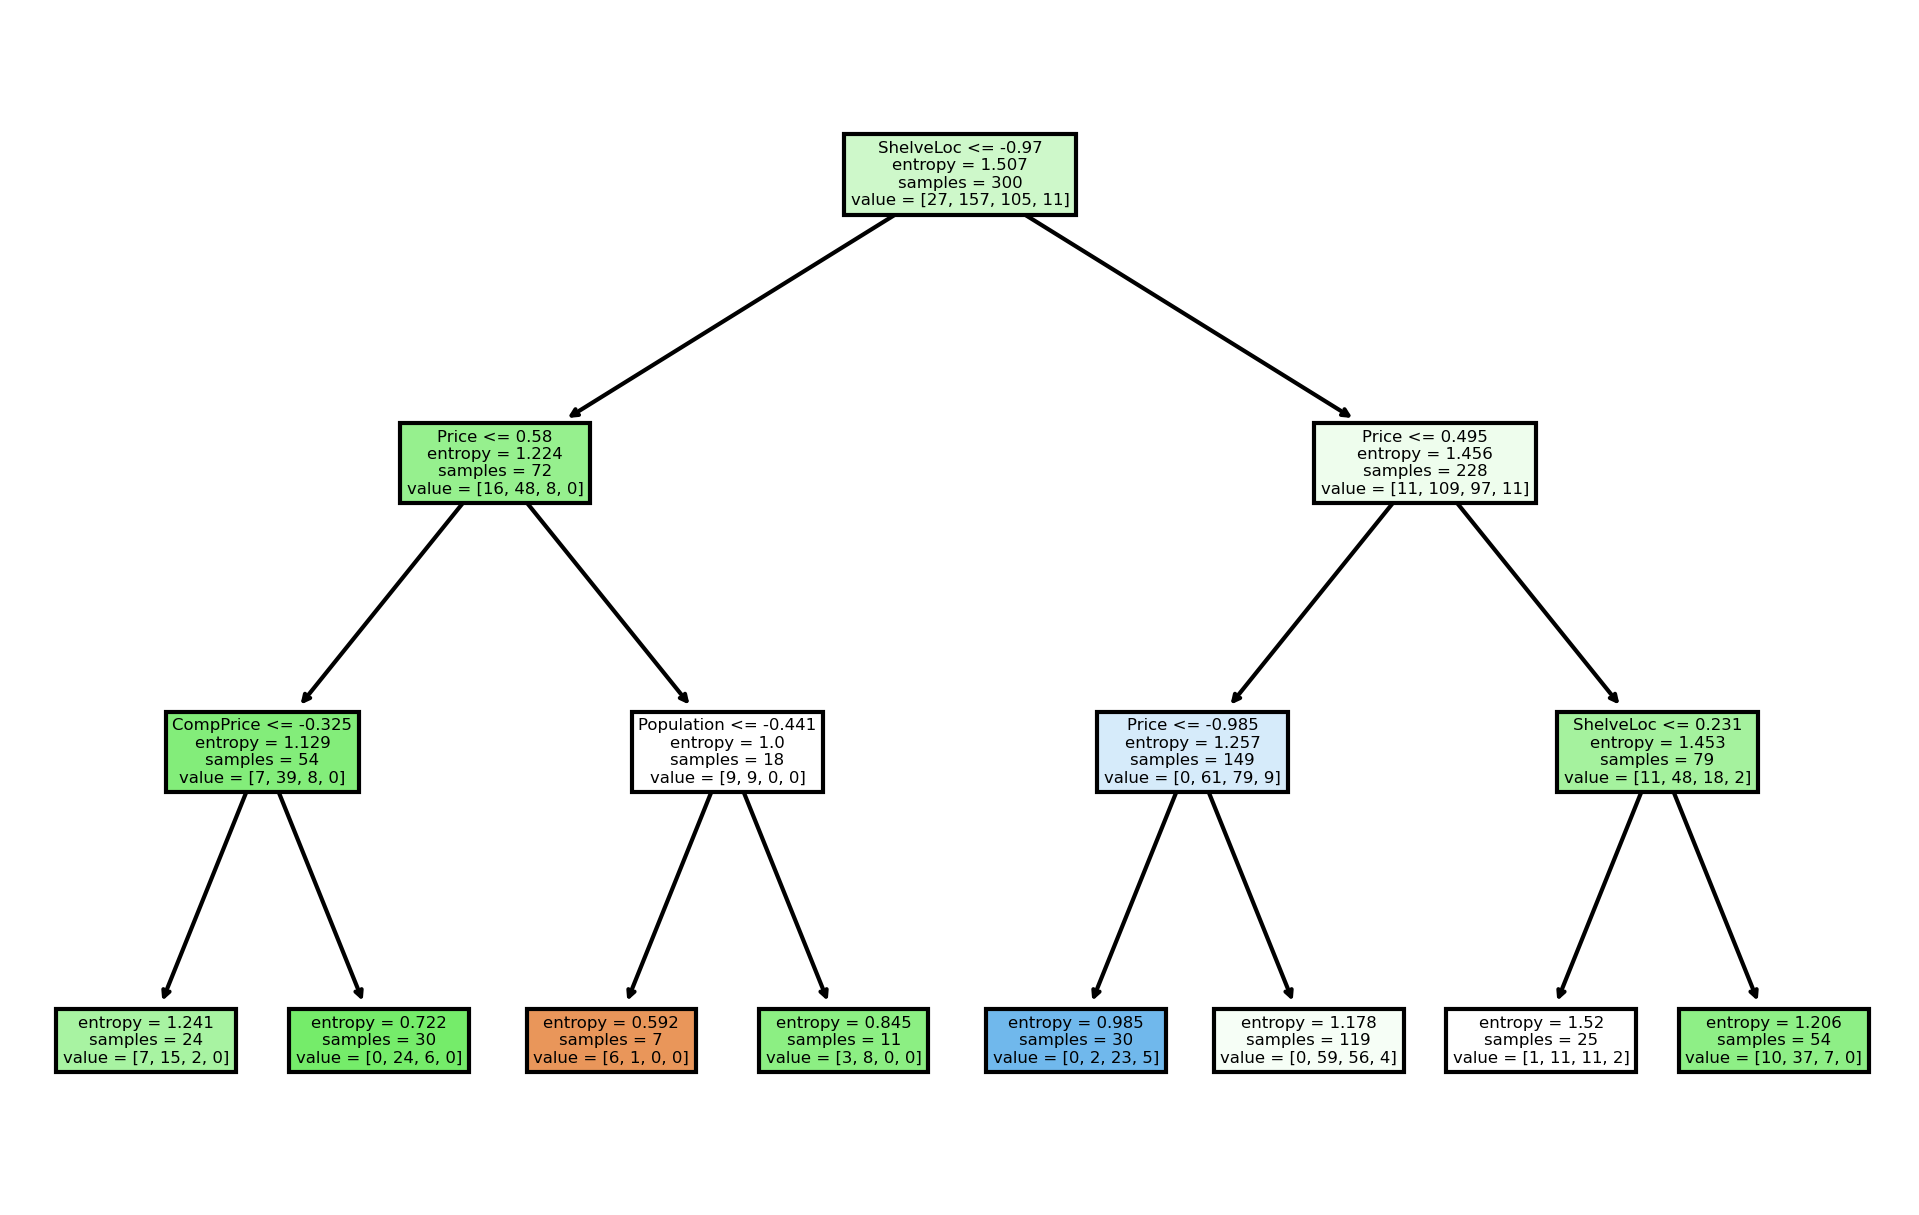

In [26]:
fn=X1.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,5), dpi=300)
tree.plot_tree(model_ent,
               feature_names = fn, 
               filled = True);

### Gini Index based Decision Tree 

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model_gini.predict(X_test)

   #print predictions

print(confusion_matrix(y_test, pred)) #cm(true data, predictions)
print("Accuracy:\n",accuracy_score(y_test, pred))

[[ 0  8  1  0]
 [ 0 38 10  0]
 [ 0 19 10  2]
 [ 0  5  5  2]]
Accuracy:
 0.5


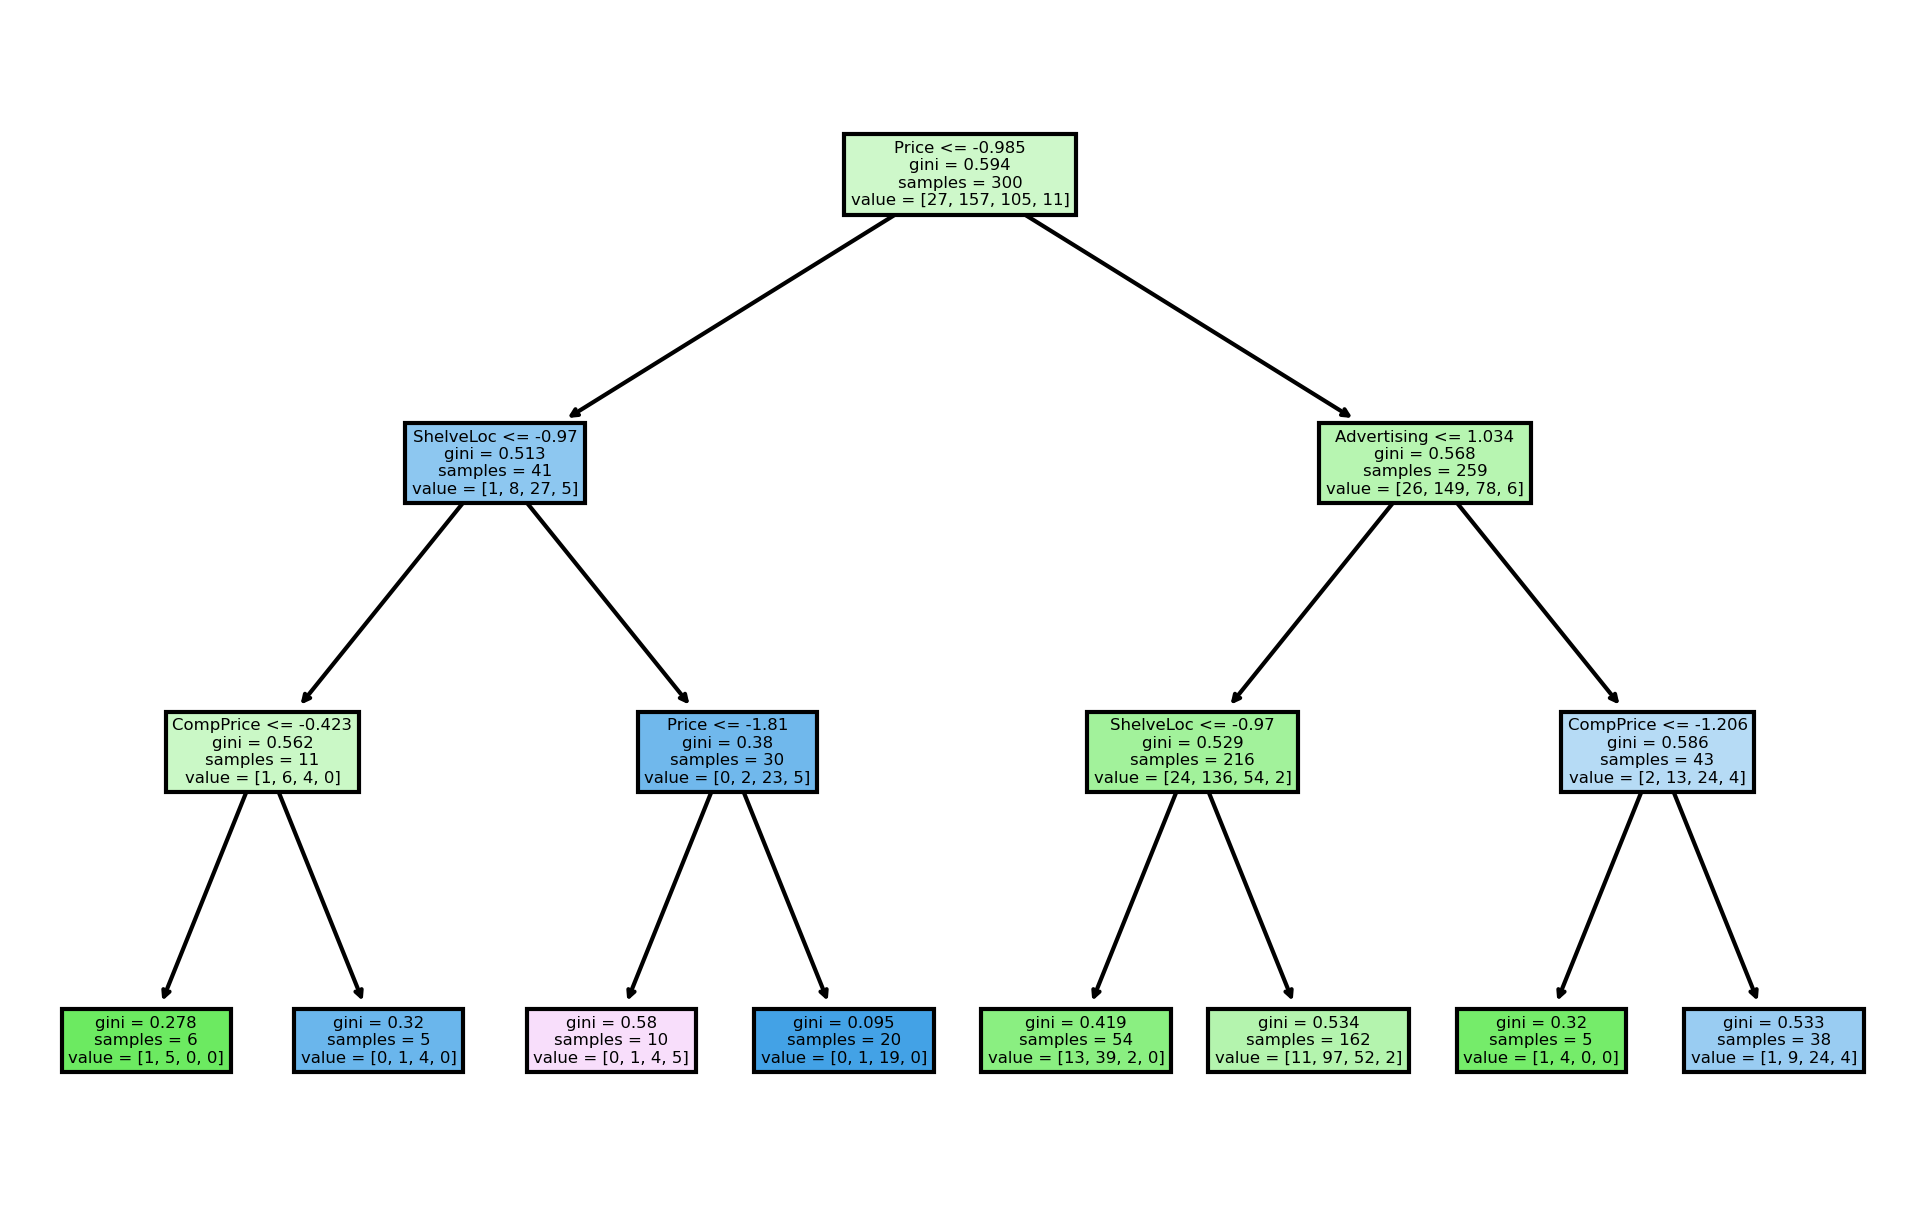

In [31]:
fn=X1.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,5), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               filled = True);

## Random Forest CLassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=3)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [33]:
pred_rf=rf.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion Matrix:\n",confusion_matrix(y_test,pred_rf))
print("Accuracy\n",accuracy_score(y_test,pred_rf))

confusion Matrix:
 [[ 0  9  0  0]
 [ 0 43  5  0]
 [ 0 17 14  0]
 [ 0  3  9  0]]
Accuracy
 0.57


### Graphviz Decision Tree Visualization

In [ ]:
#!pip install graphviz


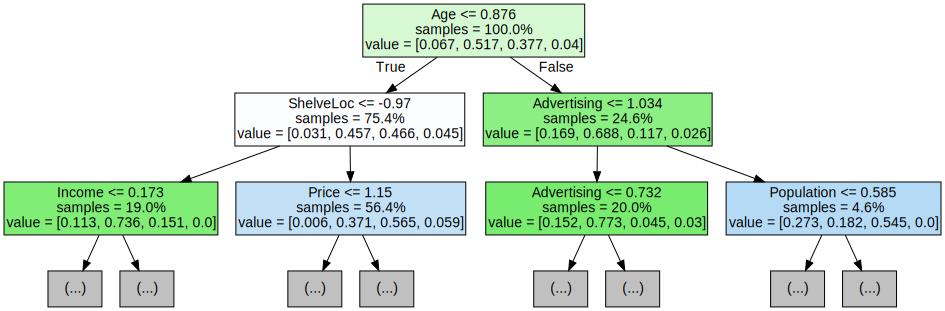

In [36]:
  
from sklearn.tree import export_graphviz
import graphviz
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                       feature_names=X1.columns,  
                               filled=True,  
                               max_depth=2, 
                              impurity=False, 
                               proportion=True)
graph = graphviz.Source(dot_data)
display(graph)